# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 12 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [2]:
# Чем выше куртосис - тем больше вероятность того, что случайная величина примет значение близкое к среднему
norm = np.random.normal(1,2,500)
chi = np.random.chisquare(3,500)
pois = np.random.poisson(10,500)
all_distribution = np.array([norm,chi,pois])
df_norm = pd.DataFrame({'mean' : [x.mean() for x in all_distribution], 'min' : [x.min() for x in all_distribution],\
                       'max' : [x.max() for x in all_distribution], 'var': [x.var() for x in all_distribution], \
                       'kurtosis' : [stats.kurtosis(x) for x in all_distribution], 'skew' : [stats.skew(x) for x in all_distribution]},
                      index = ['normal', 'chi', 'pois']).T
df_norm

,normal,chi,pois
kurtosis,0.129607,4.708087,0.532769
max,7.564897,18.986122,22.000000
mean,1.070634,3.116292,10.046000
min,-4.344096,0.126380,2.000000
skew,0.189129,1.715678,0.519025
var,4.112722,6.454071,10.663884


**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

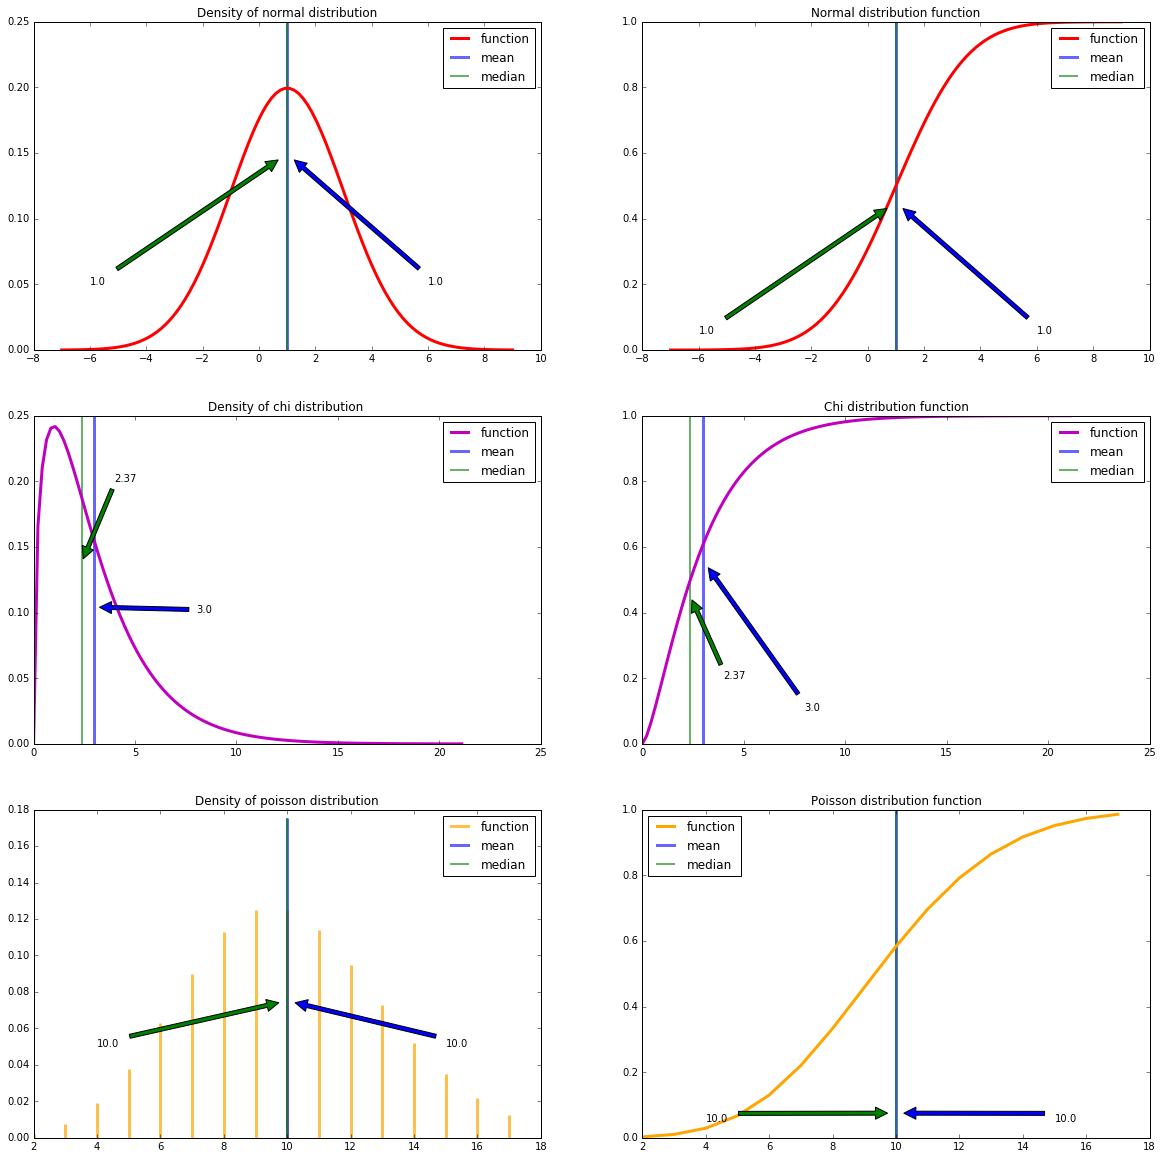

In [3]:
fig = plt.figure()
fig.set_size_inches(20,20)
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

# Нормальное распределение
mu_norm = 1
sigma = 2
normal = stats.norm(mu_norm,sigma)
x_norm = np.linspace(mu_norm - 4*sigma, mu_norm + 4*sigma, 100)
prob_dens_norm = normal.pdf(x_norm) # pdf - значение функции плотности (непрерывной) в точке х
prob_norm = normal.cdf(x_norm) # cdf - значение функции распределения в точке (вероятность того, что сл величина примет значения x или меньше)

ax1.plot(x_norm, prob_dens_norm, linewidth = 3, color = 'r', label = 'function')
ax1.vlines(normal.mean(), ymin = 0, ymax = normal.pdf(normal.mean()) + 0.05, linewidth = 3, color = 'b', alpha = 0.6, \
          label = 'mean')
ax1.vlines(normal.median(), ymin = 0, ymax = normal.pdf(normal.median()) + 0.05, linewidth = 2, color = 'g', alpha = 0.6, \
          label = 'median')
ax1.legend(loc = 'best')
ax1.annotate(normal.mean(), xy=(normal.mean(), normal.pdf(normal.mean()) - 0.05), xytext=(6, 0.05),
            arrowprops=dict(facecolor='b', shrink=0.05),
            )
ax1.annotate(normal.median(), xy=(normal.median(), normal.pdf(normal.median()) - 0.05), xytext=(-6, 0.05),
            arrowprops=dict(facecolor='g', shrink=0.05),
            )
ax1.set_title('Density of normal distribution')

ax2.plot(x_norm, prob_norm, linewidth = 3, color = 'r', label = 'function')
ax2.vlines(normal.mean(), ymin = 0, ymax = 1, linewidth = 3, color = 'b', alpha = 0.6, \
          label = 'mean')
ax2.vlines(normal.median(), ymin = 0, ymax = 1, linewidth = 2, color = 'g', alpha = 0.6, \
          label = 'median')
ax2.legend(loc = 'best')
ax2.annotate(normal.mean(), xy=(normal.mean(), normal.cdf(normal.mean()) - 0.05), xytext=(6, 0.05),
            arrowprops=dict(facecolor='b', shrink=0.05),
            )
ax2.annotate(normal.median(), xy=(normal.median(), normal.cdf(normal.median()) - 0.05), xytext=(-6, 0.05),
            arrowprops=dict(facecolor='g', shrink=0.05),
            )
ax2.set_title('Normal distribution function')

# Хи-квадрат
k_chi = 3
chi = stats.chi2(k_chi)
x_chi = np.linspace(0, chi.ppf(0.9999), 100)
prob_dens_chi = chi.pdf(x_chi)
prob_chi = chi.cdf(x_chi)

ax3.plot(x_chi, prob_dens_chi, linewidth = 3, color = 'm', label = 'function')
ax3.vlines(chi.mean(), ymin = 0, ymax = 0.25, linewidth = 3, color = 'b', alpha = 0.6, \
          label = 'mean')
ax3.vlines(chi.median(), ymin = 0, ymax = 0.25, linewidth = 2, color = 'g', alpha = 0.6, \
          label = 'median')
ax3.legend(loc = 'best')
ax3.annotate(round(chi.mean(),2), xy=(chi.mean(), chi.pdf(chi.mean()) - 0.05), xytext=(8, 0.1),
            arrowprops=dict(facecolor='b', shrink=0.05),
            )
ax3.annotate(round(chi.median(),2), xy=(chi.median(), chi.pdf(chi.median()) - 0.05), xytext=(4, 0.2),
            arrowprops=dict(facecolor='g', shrink=0.05),
            )
ax3.set_title('Density of chi distribution ')

ax4.plot(x_chi, prob_chi, linewidth = 3, color = 'm', label = 'function')
ax4.vlines(chi.mean(), ymin = 0, ymax = 1, linewidth = 3, color = 'b', alpha = 0.6, \
          label = 'mean')
ax4.vlines(chi.median(), ymin = 0, ymax = 1, linewidth = 2, color = 'g', alpha = 0.6, \
          label = 'median')
ax4.legend(loc = 'best')
ax4.annotate(round(chi.mean(),2), xy=(chi.mean(), chi.cdf(chi.mean()) - 0.05), xytext=(8, 0.1),
            arrowprops=dict(facecolor='b', shrink=0.05),
            )
ax4.annotate(round(chi.median(),2), xy=(chi.median(), chi.cdf(chi.median()) - 0.05), xytext=(4, 0.2),
            arrowprops=dict(facecolor='g', shrink=0.05),
            )
ax4.set_title('Chi distribution function')


#Пуассоновское
mu_pois = 10
pois = stats.poisson(mu_pois)
x_pois = np.arange(pois.ppf(0.001), pois.ppf(0.99))
prob_dens_pois = pois.pmf(x_pois) # pmf - значение вероятности в точке (аналог функции плотности для дискретного случая)
prob_pois = pois.cdf(x_pois)

ax5.vlines(x_pois, prob_dens_pois, ymax = 0, linewidth = 3, color = 'orange', alpha = 0.7, \
          label = 'function')
ax5.vlines(pois.mean(), ymin = 0, ymax = pois.pmf(pois.mean()) + 0.05, linewidth = 3, color = 'b', alpha = 0.6, \
          label = 'mean')
ax5.vlines(pois.median(), ymin = 0, ymax = pois.pmf(pois.median()) + 0.05, linewidth = 2, color = 'g', alpha = 0.6, \
          label = 'median')
ax5.legend(loc = 'best')
ax5.annotate(pois.mean(), xy=(pois.mean(), pois.pmf(pois.mean()) - 0.05), xytext=(15, 0.05),
            arrowprops=dict(facecolor='b', shrink=0.05),
            )
ax5.annotate(pois.median(), xy=(pois.median(), pois.pmf(pois.median()) - 0.05), xytext=(4, 0.05),
            arrowprops=dict(facecolor='g', shrink=0.05),
            )
ax5.set_title('Density of poisson distribution')

ax6.plot(x_pois, prob_pois, linewidth = 3, color = 'orange', label = 'function')
ax6.vlines(pois.mean(), ymin = 0, ymax = 1, linewidth = 3, color = 'b', alpha = 0.6, \
          label = 'mean')
ax6.vlines(pois.median(), ymin = 0, ymax = 1, linewidth = 2, color = 'g', alpha = 0.6, \
          label = 'median')
ax6.legend(loc = 'best')
ax6.annotate(pois.mean(), xy=(pois.mean(), pois.pmf(pois.mean()) - 0.05), xytext=(15, 0.05),
            arrowprops=dict(facecolor='b', shrink=0.05),
            )
ax6.annotate(pois.median(), xy=(pois.median(), pois.pmf(pois.median()) - 0.05), xytext=(4, 0.05),
            arrowprops=dict(facecolor='g', shrink=0.05),
            )
ax6.set_title('Poisson distribution function')
#plt.vlines(pois.mean(), ymin = 0, ymax = pois.pmf(pois.mean())+0.05)
#plt.vlines(pois.median(), ymin = 0, ymax = pois.pmf(pois.median())+0.05)

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [4]:
# Нормальное распределение
mu_norm = 1
sigma = 2
norm = stats.norm(mu_norm,sigma)
_norm = norm.rvs(size = 500)
print ('%s : %s \n' %('Normal distribution',stats.describe(_norm)))

# Хи-квадрат
k_chi = 3
chi = stats.chi2(k_chi)
_chi = chi.rvs(size = 500)
print('%s : %s \n' %('Chi-square distribution',stats.describe(_chi)))

# Пуассоновское
mu_pois = 10
pois = stats.poisson(mu_pois)
_pois = pois.rvs(size = 500)
print('%s : %s \n' %('Poisson distribution', stats.describe(_pois)))

Normal distribution : DescribeResult(nobs=500, minmax=(-5.0237372122163428, 7.622541264099139), mean=1.0023641848895131, variance=3.9944241908174254, skewness=0.06775075920712581, kurtosis=0.16641283186236766) 

Chi-square distribution : DescribeResult(nobs=500, minmax=(0.016804615572746043, 17.371520846702698), mean=3.0111696748302657, variance=6.83021022094049, skewness=1.7404275647508425, kurtosis=4.342954741965528) 

Poisson distribution : DescribeResult(nobs=500, minmax=(2, 18), mean=9.984, variance=9.434613226452905, skewness=0.0728208050682864, kurtosis=-0.40543696008974095) 



## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

<ul>
<li>Коэффицент корреляции Пирсона показывает силу <i><b>линейной</b></i> зависимости между двумя случайными величинами. Чем сильнее линейная зависимость, тем ближе значение корреляции по модулю к единице. Если она равна 1 - то прямая линейная зависимость, если -1 - то обратная. Коэффицент корреляции Пирсона часто используется для проверки гипотезы о наличии <i><b>линейной</b></i> зависимости между случайными величинами</li>

<li>Коэффицент корреляции Спирмена показывает силу <i><b>монотонной</b></i> зависимости между двумя случайными величинами. Необязательно, чтобы она была линейной. Коэффицент корреляции Спирмена часто используется для проверки гипотезы о наличии <i><b>монотонной</b></i> зависимости между случайными величинами</li>
</ul>

<b>Продемонстрируем разницу на примере</b>

Корреляция Пирсона 0.819461174376
Корреляция Спирмена 1.0


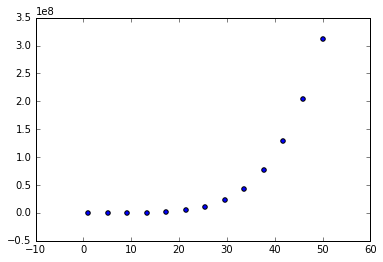

In [5]:
func = lambda x: x**(5)
z = np.linspace(1,50,13)
v = np.apply_along_axis(func,0,z)
plt.scatter(z,v)
print('Корреляция Пирсона',stats.pearsonr(z,v)[0])
print('Корреляция Спирмена',stats.spearmanr(v,z)[0])

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [6]:
# at - более быстрый способ итеррироваться по dataframe, если нужно одно значение
df = pd.read_csv('beauty.csv', sep = ';')

def method_corr(x):
    columns = df.columns.values
    corr_pears = pd.Series([])
    for i in range(len(columns)):
        for k in range(i+1,len(columns)):
            corr_pears[str(columns[i])+' - '+str(columns[k])] = x(df[columns[i]], df[columns[k]])[0]
    corr_pears_max_corr = corr_pears.apply(abs).sort_values(ascending = False)[:3]
    for i in corr_pears_max_corr.index.get_values():
        corr_pears_max_corr[i] = corr_pears[i]
    return corr_pears_max_corr

print('Pearson correlation',method_corr(stats.pearsonr), sep = '\n\n', end = '\n\n')
print('Spearman correlation', method_corr(stats.spearmanr), sep = '\n\n')

Pearson correlation

female - married   -0.319228
wage - female      -0.313419
service - educ      0.301628
dtype: float64

Spearman correlation

wage - female      -0.448844
wage - exper        0.360861
female - married   -0.319228
dtype: float64


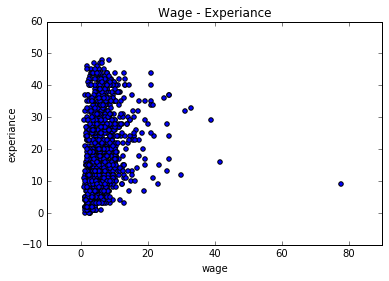

In [7]:
# Интересно пронаблюдать за парой wage-experiance, ведь они не бинарные случайные величины
plt.scatter(df['wage'],df['exper'])
plt.xlabel('wage')
plt.ylabel('experiance')
plt.title('Wage - Experiance')

<ul>
<li><b>female - married отрицательная корреляция означает, что мужчины из выборки вероятнее окажутся в браке, чем женщины из выборки</b>. Или: уменьшение значения female (до 0) вероятнее увеличивает значение married (до 1)</li>

<li><b>female - wage отрицательная корреляция означает, что у мужчин выше зарплата, чем у женщин</b>, так как уменьшение значения female (до 0) увеличивает значение случайной величины wage </li>

<li><b> wage - exper положительная корреляция означает, что, в целом, чем больше опыт - тем выше заработная плата у человека </b>. При чем данная зависимость не близка к линейной - в целом из точечной диаграммы видно, что влияние увеличение опыта на увеличение зарплаты - сначала возрастающее, потом убывающее</li>

<li><b> service - education положительная корреляция означает, что в секторе услуг задействованы люди с более высоким уровнем образования, чем люди, задействованные в других секторах </b>. То есть, увеличение education увеличивает service (до 1)</li>

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

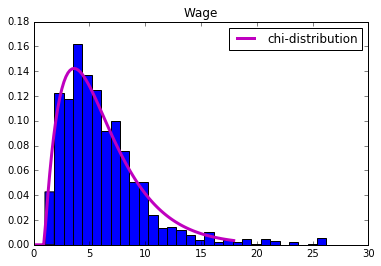

Параметры хи-распределения: (4.1485545726592621, 0.93219664195955643, 1.2543259653262209)
p-value для хи-квадрат 0.0


In [8]:
from scipy.stats import norm,rayleigh,chi2,f
param = chi2.fit(df['wage'][df['wage'] < 29]) # откинем слишком большие значения wage, представленные в данной выборке с низкой частотой
x_chi = np.linspace(0, chi2.ppf(0.99, df = param[0], loc = param[1], scale = param[2]), 100)
prob_dens_chi = chi2.pdf(x_chi, df = param[0], loc = param[1], scale = param[2])
plt.hist(df['wage'][df['wage'] < 29], bins = 30,normed = True)
plt.plot(x_chi, prob_dens_chi, linewidth = 3, color = 'm', label = 'chi-distribution')
plt.legend(loc = 'best')
plt.title('Wage')
plt.show()
print('Параметры хи-распределения:', param)

print('p-value для хи-квадрат', stats.chisquare(df['wage'])[1]) # Хороший результат

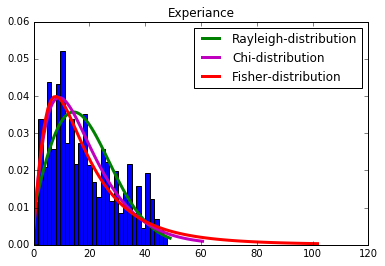

Распределение: хи-квадрат с параметрами (4.1541539090657587, -0.49492382022819947, 4.5018244141899446)
p-value для хи-квадрат 0.0


In [9]:
param = chi2.fit(df['exper'])
x_chi = np.linspace(0, chi2.ppf(0.99, df = param[0], loc = param[1], scale = param[2]), 100)
prob_dens_chi = chi2.pdf(x_chi, df = param[0], loc = param[1], scale = param[2])

param1 = rayleigh.fit(df['exper'])
x_rayligh = np.linspace(0, rayleigh.ppf(0.99, param1[0],param1[1]), 100)
prob_dens_rayligh = rayleigh.pdf(x_rayligh, param1[0],param1[1])

param2 = f.fit(df['exper'])
x_fisher = np.linspace(0, f.ppf(0.99, dfn = param2[0], dfd = param2[1], loc = param2[2], scale = param2[3]), 100)
prob_dens_fisher = f.pdf(x_fisher, dfn = param2[0], dfd = param2[1], loc = param2[2], scale = param2[3])

plt.hist( df['exper'], bins = 30,normed = True)
plt.plot(x_rayligh, prob_dens_rayligh, linewidth = 3, color = 'g', label = 'Rayleigh-distribution')
plt.plot(x_chi, prob_dens_chi, linewidth = 3, color = 'm', label = 'Chi-distribution')
plt.plot(x_fisher, prob_dens_fisher, linewidth = 3, color = 'r', label = 'Fisher-distribution' )
plt.legend(loc = 'best')
plt.title('Experiance')
plt.show()

# Хи-квадрат распределение:
print('Распределение: хи-квадрат с параметрами', param)

print('p-value для хи-квадрат', stats.chisquare(df['exper'])[1]) # Хороший результат

<b> Выведем общий алгоритм нахождения параметра p (вероятность того, что с.в. примет значение 1) Бернуллиевского распределения </b>

In [10]:
from sympy import *
def bernoulli(x): # Можно конечно просто сказать, что MM и ML оценка для бернулли совпадает, а значит p = m/n
    union_no = df[x == 0].shape[0]
    union_yes = df[x == 1].shape[0] 
    p = Symbol('p', real=True)
    func = log(p)*union_yes + log(1-p)*union_no # Метод максимального правдоподобия для дискретной случайной величины
    p_expec = solve(func.diff(),p)[0] # Вероятность того, что union = 1
    return p_expec

<h3>Бернуллиевские случайные величины:</h3>

p - оценка вероятности того, что с.в. примет значение 1


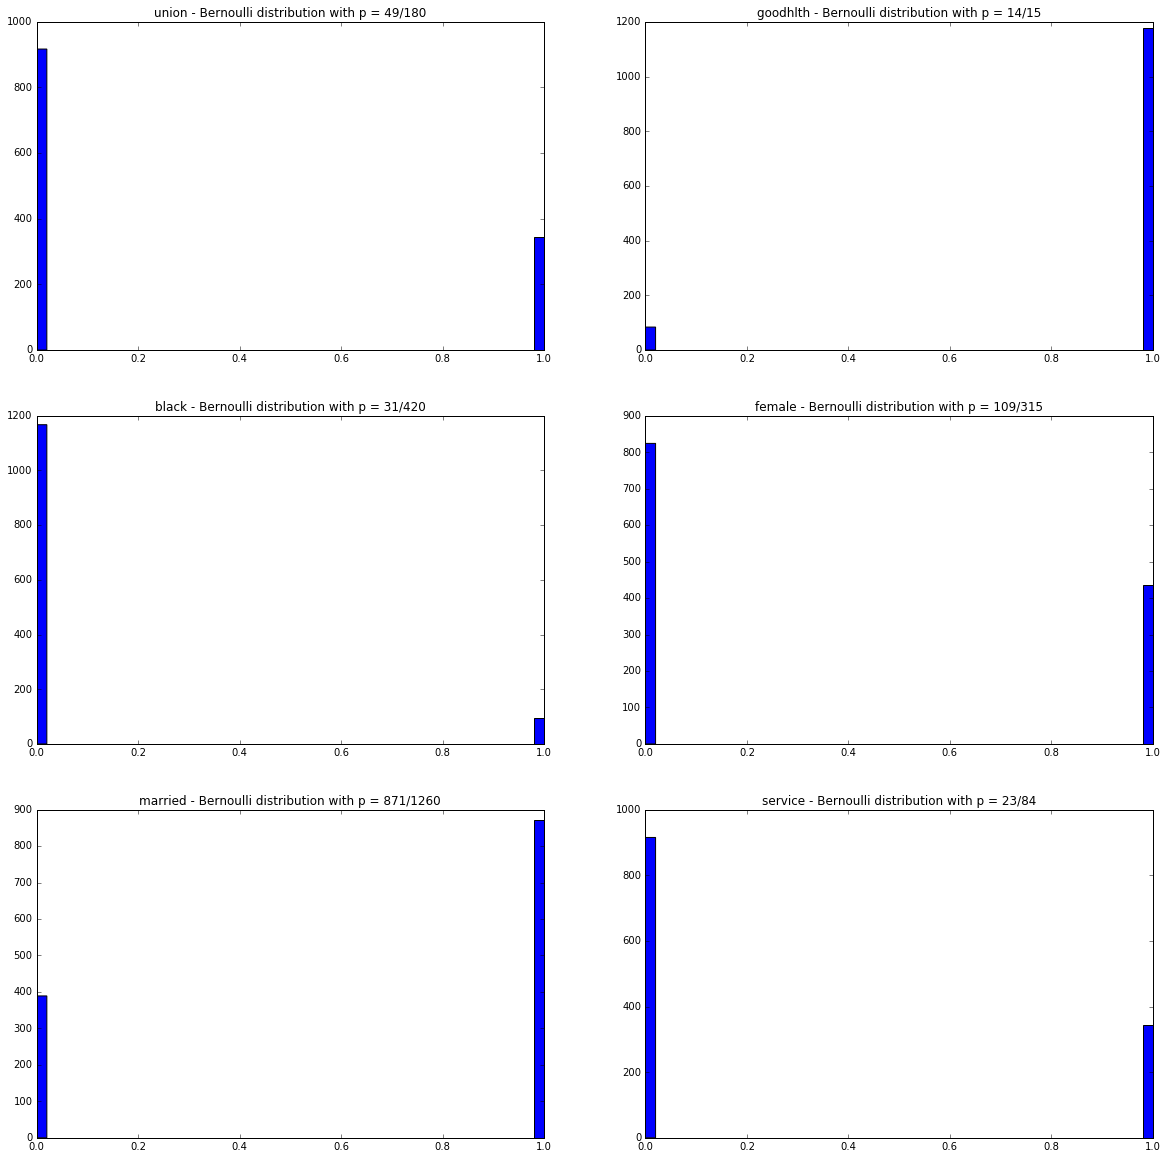

In [11]:
fig = plt.figure()
fig.set_size_inches(20,20)
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
s = 0 # Счетчик
print('p - оценка вероятности того, что с.в. примет значение 1')
for i in df.columns.values[2:]:
    if len(df[i].unique()) == 2: # Проверка на Бернулли
        s += 1
        eval('ax'+str(s)).hist(df[i], bins = 50)
        p_union = bernoulli(df[i])
        eval('ax'+str(s)).set_title(str(i)+ ' - Bernoulli distribution with p = ' + str(p_union))

<h3>Теперь исследуем признаки  educ, looks</h3>

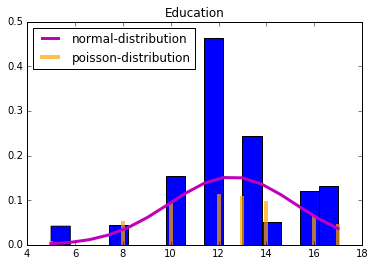

Параметры нормального распределения: (12.563492063492063, 2.6234474826802723)


In [12]:
_,bins,_ = plt.hist(df['educ'], bins = 15, normed = True) # Нормальное распределение или пуассоновское с тем же мат ожиданием

param = norm.fit(df['educ'])
x_norm = np.array([_,bins,_])[1]
prob_dens_norm = norm.pdf(x_norm, param[0], param[1])

pois = stats.poisson(param[0])
x_pois = df['educ'].unique()
prob_dens_pois = pois.pmf(x_pois)

plt.vlines(x_pois, prob_dens_pois, ymax = 0, linewidth = 4, color = 'orange', alpha = 0.7, \
          label = 'poisson-distribution')
plt.plot(x_norm, prob_dens_norm, linewidth = 3, color = 'm', label = 'normal-distribution')
plt.legend(loc = 'best')
plt.title('Education')
plt.show()
print('Параметры нормального распределения:', param) 
plt.show()

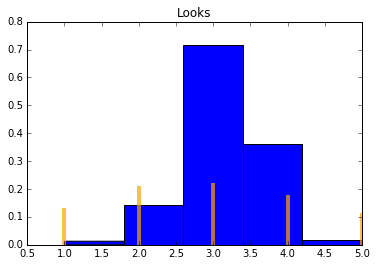

Интенсивность пуассоновского распределения: 3.1857142857142855


In [13]:
plt.hist(df['looks'], bins = 5, normed = True)  # Пуассоновское распределение
# Согласно методу максимального правдоподобия, лямбда = среднему по выборке или mean из норм. распределения, полученного с помощью ML
pois = stats.poisson(df['looks'].mean())
x_pois = df['looks'].unique()
prob_dens_pois = pois.pmf(x_pois)
plt.vlines(x_pois, prob_dens_pois, ymax = 0, linewidth = 4, color = 'orange', alpha = 0.7, \
          label = 'poisson-distribution')
plt.title('Looks')
plt.show()
print('Интенсивность пуассоновского распределения:', df['looks'].mean())

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [15]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
text_all = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'sci.space'])
text_train, text_test, y_train, y_test = train_test_split(text_all.data, text_all.target, train_size=0.7, random_state=42)

**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [17]:
vectorizer = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)
X_train = vectorizer.fit_transform(text_train)
X_test = vectorizer.transform(text_test) # transform, потому что мы строим предположения относительно частоты встречаемых слов в X_train
# transform обеспечивает X_test столбцы из X_train, чтобы мы могли строить вероятность того, что конкретное слово из X_test встречается в тесте с конкретной темой
# А если слова из X_test не будет в X_train, то проверка теряет смысл

**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [18]:
x = X_train.toarray().sum(axis=0)
analize = pd.Series(x,[y for y in range(len(x))])
analize = analize.sort_values(ascending = False)[:50]
for i in analize.index:
    print(analize[i],vectorizer.get_feature_names()[i]) # Результат оформлен в форме: частота -> слово

1596 edu
1014 space
827 subject
777 lines
756 com
745 organization
719 writes
610 article
576 people
575 god
529 nasa
484 don
455 posting
434 think
414 just
411 like
367 nntp
366 host
360 does
336 know
320 university
320 time
296 say
273 launch
263 said
257 earth
255 way
252 gov
243 world
243 believe
242 atheists
238 good
233 orbit
225 keith
224 moon
222 things
221 atheism
220 new
218 make
211 cs
208 data
199 science
198 access
190 years
189 long
188 jesus
180 satellite
178 year
175 religion
175 use


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [19]:
clf1 = MultinomialNB(alpha=1.0).fit(X_train, y_train)
pred_1 = clf1.predict(X_test)
ML_prob = clf1.predict_proba(X_test)
print(metrics.accuracy_score(y_test, pred_1, sample_weight=None)) # Высокая точность
for i in range(len(pred_1)):
    if pred_1[i] != y_test[i]:
        print(ML_prob[i]) # какие вероятности предсказал классификатор, которые не сбылись

0.993788819876
[ 0.82899666  0.17100334]
[  1.00000000e+00   4.70080332e-49]


**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [20]:
clf2 = MultinomialNB(alpha=0.0).fit(X_train, y_train)
pred_2 = clf2.predict(X_test)
ML_prob2 = clf2.predict_proba(X_test)
print(metrics.accuracy_score(y_test, pred_2, sample_weight=None)) # Низкая точность
for i in range(len(pred_2)):
    if pred_2[i] != y_test[i]:
        print(ML_prob2[i]) # много Nan

0.593167701863
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[ nan  nan]
[

Вывод: отсутсвие сглаживания для наивного Байессовского классификатора ведет к тому, что, если в тестере встретилось некоторое значение, которое ни разу не встречалось в связке с некоторым классом в тренировочных данных, то вероятность того, что исследуемый объект будет принадлежать к этому классу сразу обнуляется, что конечно же не может быть правильным методом, ведь другие значения могут прекрасно подходить под свойства этого класса